<img src='titulo.png' style='width:600px; float:left' />

<br/>



## REGRESSÃO LINEAR SIMPLES

In [1]:
## IMPORTAÇÕES
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline



## DADOS

In [2]:
X = [0.5, 2.2, 2.0]
y = [2.0, 2.5, 1.4]

## TAXA DE APRENDIZADO ( velocidade de descida )
<img src='alfa.png' style="width:30px; float:left"/> 

In [3]:
alpha = 0.01

## VALORES INICIAIS PARA W0 e W1

In [4]:
w0 = 0.1
w1 = 0.1

<h1>DEFININDO A HIPÓTESE</h1>
<img src='hipotese.png' style="width:300px; float:left"/> 


In [5]:
def y_hat(x, w0, w1):
    return w0 + w1*x

In [6]:
## realizando uma predição ainda com custo alto
y_hat(1.5, w0, w1)

0.25

## FUNÇÃO PARA PLOTAR PONTOS E REGRESSÃO

In [7]:
def plot_line(X, y, w0, w1):
    x_values = [i for i in range(int(min(X))-1,int(max(X))+2)]
    y_values = [y_hat(x, w0, w1) for x in x_values]
    plt.plot(x_values,y_values,'r')
    plt.plot(X,y,'bo')

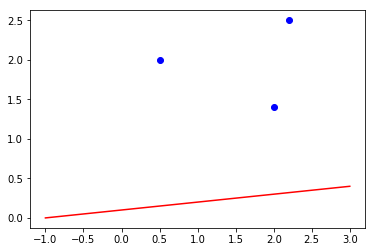

In [8]:
plot_line(X,y,w0,w1)

## FUNÇÃO MSE (Média do erro ao quadrado)

<img src='mse-erro.png' style="width:500px; float:left"/> 

In [9]:
def MSE (X, y , w0 , w1):
    custo = 0
    m = float(len(X))
    for i in range(0, len(X)):
        custo += (y_hat(X[i], w0, w1)-y[i])**2
        
    return custo/m



In [10]:
MSE(X,y, w0, w1)

3.1282999999999994

<h1 style="color:blue"> ALGORITMO DO GRADIENTE DESCENDENTE</h1>

<img src='gradiente.png' style="width:500px; float:left"/> 

### GRADIENTE DESCENDENTE STEP

In [11]:
def gradient_descent_step(w0, w1, X, y, alpha):
    
    erro_w0 = 0
    erro_w1 = 0
    m = float(len(X))
    
    for i in range(0,len(X)):
        erro_w0 += y_hat(X[i], w0, w1) - y[i]
        erro_w1 += (y_hat(X[i], w0, w1) - y[i]) * X[i]
        
    new_w0 = w0 - alpha * (1/m) * erro_w0
    new_w1 = w1 - alpha * (1/m) * erro_w1

    return new_w0, new_w1


### GRANDIENTE DESCENDENTE LOOP

In [12]:
epoch = 800

In [13]:
def gradient_descent(w0, w1, X, y, alpha, epoch):
    custo = np.zeros(epoch)
    for i in range(epoch):
        w0 , w1 = gradient_descent_step(w0, w1, X, y , alpha)
        custo[i] = MSE(X,y,w0,w1)
        
    return w0, w1, custo
    
    
    

In [14]:
w0 , w1 , custo = gradient_descent(w0, w1, X, y, alpha, epoch)

In [15]:
custo

array([2.93421022, 2.75481098, 2.58898416, 2.43569679, 2.29399451,
       2.16299563, 2.04188557, 1.92991176, 1.82637893, 1.73064474,
       1.64211573, 1.56024364, 1.48452194, 1.41448265, 1.34969343,
       1.28975485, 1.23429788, 1.18298158, 1.13549098, 1.09153508,
       1.05084502, 1.01317242, 0.9782878 , 0.94597917, 0.91605065,
       0.88832129, 0.8626239 , 0.83880403, 0.81671898, 0.79623691,
       0.77723603, 0.75960381, 0.74323628, 0.7280374 , 0.71391842,
       0.70079738, 0.68859852, 0.67725187, 0.66669278, 0.65686152,
       0.6477029 , 0.63916595, 0.63120356, 0.62377221, 0.61683171,
       0.6103449 , 0.60427747, 0.59859771, 0.59327633, 0.58828627,
       0.58360252, 0.57920198, 0.57506331, 0.57116679, 0.5674942 ,
       0.56402872, 0.56075478, 0.55765802, 0.55472517, 0.55194396,
       0.54930306, 0.54679199, 0.5444011 , 0.54212143, 0.53994473,
       0.53786337, 0.53587031, 0.53395902, 0.53212349, 0.53035816,
       0.52865789, 0.52701793, 0.5254339 , 0.52390175, 0.52241

In [16]:
print("w0={}, w1={}".format(w0,w1))

w0=1.4791425637671534, w1=0.26991125930251886


## PLOTANDO O CUSTO

Text(0.5,1,'MSE vs. Epoch')

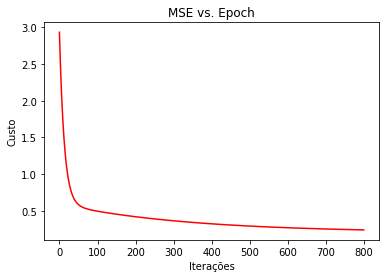

In [17]:
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), custo, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('MSE vs. Epoch')  

## PLOTANDO A HIPÓTESE OTIMIZADA

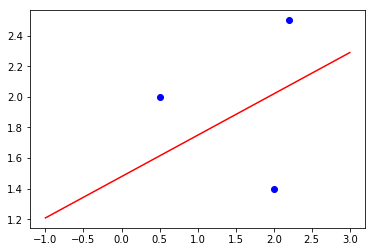

In [18]:
plot_line(X,y, w0, w1)

## REALIZADO UMA PREVISÃO

In [19]:
y_hat(1.5, w0, w1)

1.8840094527209317

In [20]:
print("w0={}, w1={}".format(w0,w1))

w0=1.4791425637671534, w1=0.26991125930251886


In [21]:
w0 + w1*1.5

1.8840094527209317